# Machine Learning applied to MuJoCo environment – Inverse Kinematics

* ### Author: Mowibox (Ousmane THIONGANE)
* ### Date: November 4th, 2024

## Imports

In [9]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from utils import dispIK_2R, dispIK_3R, Model, angular_loss

## I - Loading the models

In [10]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                print(f"2R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_2R.append(model)
            elif '3R' in filename:
                print(f"3R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_3R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")

2R Model found : NN1_2R_p10_e20.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN2_2R_p10_e20.keras
2R Model found : NN2_2R_p10_e20_raw.keras
3R Model found : NN2_3R_p10_e20.keras
3R Model found : NN2_3R_p10_e20_raw.keras
Number of 2R models : 3
Number of 3R models : 3


## I - Inverse Kinematics - Newton-Raphson method

# 1.1) 2R Robot

===== Step n°0 =====
Current Position: [0.00225731 0.15428959]
Intermediate joint angles: [0.7853982 1.5707964]

===== Step n°1 =====
Current Position: [-0.15929568 -0.08297992]
Intermediate joint angles: [-2.126425   5.2258506]

===== Step n°2 =====
Current Position: [-0.01543532  0.06682393]
Intermediate joint angles: [-15.588603  22.618895]

===== Step n°3 =====
Current Position: [-0.00964193 -0.00436577]
Intermediate joint angles: [-16.467436  21.89373 ]

===== Step n°4 =====
Current Position: [-0.13904774  0.05990488]
Intermediate joint angles: [-15.318956  23.607729]

===== Step n°5 =====
Current Position: [ 0.07354169 -0.09011116]
Intermediate joint angles: [-14.495062  20.875553]

===== Step n°6 =====
Current Position: [ 0.09742269 -0.01682842]
Intermediate joint angles: [-13.878416  20.97384 ]

===== Step n°7 =====
Current Position: [ 0.13283315 -0.0006181 ]
Intermediate joint angles: [-13.622984  20.625408]

===== Step n°8 =====
Current Position: [0.14697048 0.00059864]
Inter

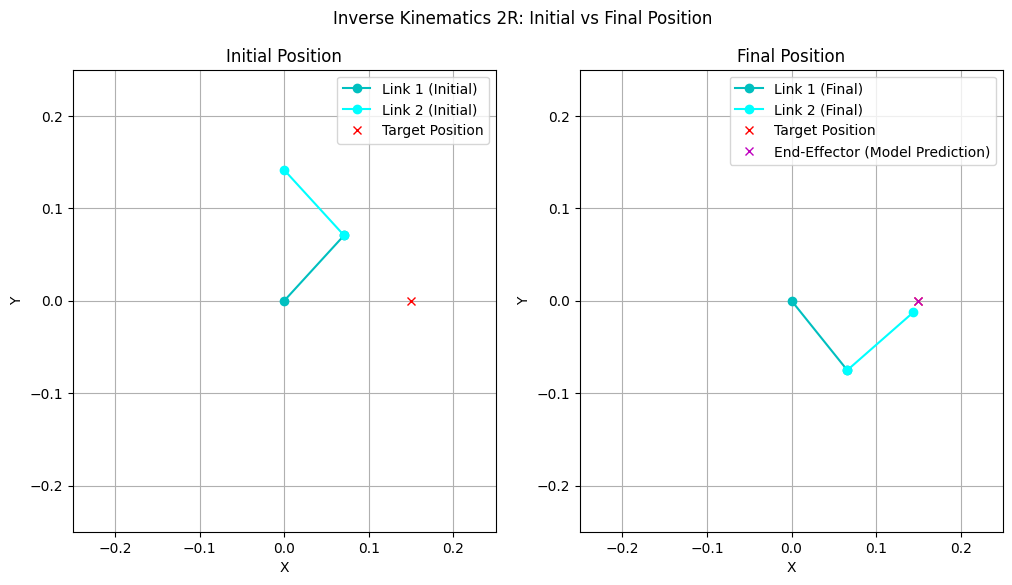

Distance error: 0.013990362459963693



In [11]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False
    
target_position = [0.15, 0] 
initial_guess = [np.pi/4, np.pi/2]  
dispIK_2R(model_2R, target_position, initial_guess, raw, display_error=True)

# 1.2) 3R Robot

===== Step n°0 =====
Current Position: [ 0.259517   -0.00546381]
Intermediate joint angles: [-0.7853982  0.5235988  0.7853982]

===== Step n°1 =====
Current Position: [ 0.19813737 -0.14592105]
Intermediate joint angles: [-1.5107296  1.6056064  5.619423 ]

===== Step n°2 =====
Current Position: [ 0.17839012 -0.1382998 ]
Intermediate joint angles: [-5.7274466  4.2007136  6.625935 ]

===== Step n°3 =====
Current Position: [ 0.16636989 -0.01397817]
Intermediate joint angles: [ 5.8570175 13.637299  -9.682255 ]

===== Step n°4 =====
Current Position: [-0.05715257  0.03022475]
Intermediate joint angles: [ 6.0001187 16.521477  -8.530916 ]

===== Step n°5 =====
Current Position: [-0.17299256 -0.33652318]
Intermediate joint angles: [ 3.8277276 15.331614  -9.6441965]

===== Step n°6 =====
Current Position: [ 0.04598038 -0.05141611]
Intermediate joint angles: [  3.8914902  15.521097  -11.729691 ]

===== Step n°7 =====
Current Position: [-0.19420889 -0.12730518]
Intermediate joint angles: [  4.1967

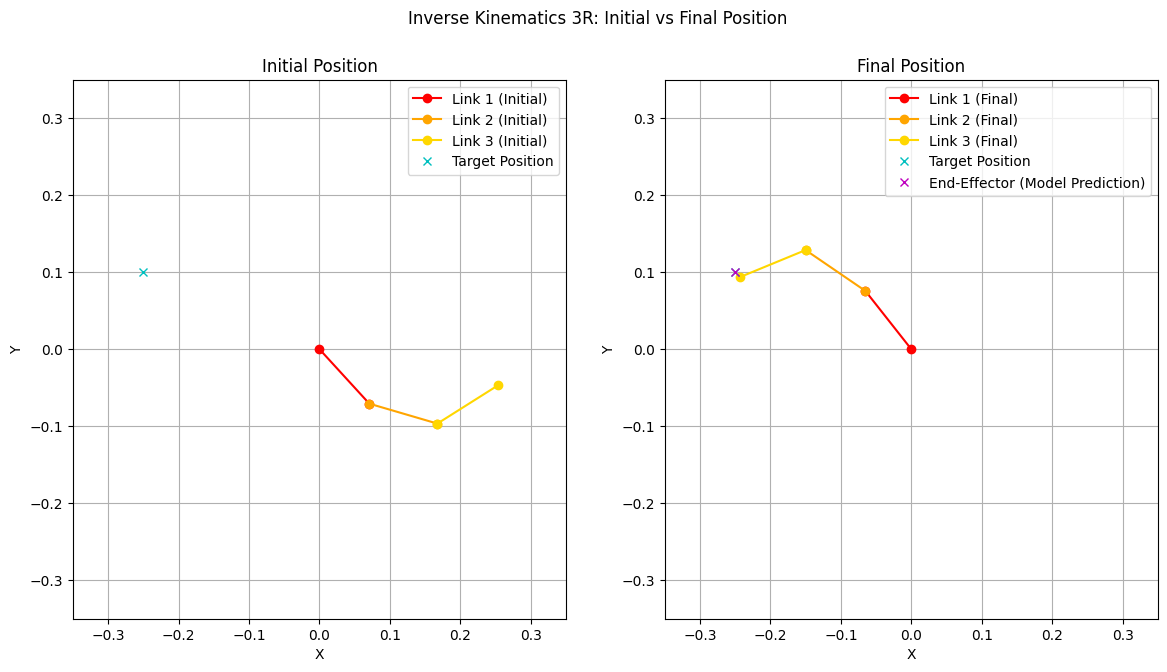

Distance error: 0.009095593182113993



In [12]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

target_position = [-0.25, 0.1] 
initial_guess = [-np.pi/4, np.pi/6, np.pi/4]  
dispIK_3R(model_3R, target_position, initial_guess, raw, display_error=True)